In [1]:
#What is our goal? : Can you predict whether a viewer will rate a movies positively or negatively? Use the viewer ratings data to create a machine learning model that can predict whether a viewer will rate a movie positively or negatively

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
BestMovies = pd.read_csv("C:/Users/lesle/Desktop/Best Movies Netflix.csv")

In [6]:
BestMovies.head(5)

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,1,Inception,2010,8.8,2268288,148,scifi,GB
2,2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US


In [7]:
#statistical exploration

In [9]:
BestMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            387 non-null    int64  
 1   TITLE            387 non-null    object 
 2   RELEASE_YEAR     387 non-null    int64  
 3   SCORE            387 non-null    float64
 4   NUMBER_OF_VOTES  387 non-null    int64  
 5   DURATION         387 non-null    int64  
 6   MAIN_GENRE       387 non-null    object 
 7   MAIN_PRODUCTION  387 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 24.3+ KB


In [12]:
BestMovies['MAIN_GENRE'].value_counts()

drama          151
thriller        59
comedy          58
crime           21
romance         21
documentary     20
fantasy         19
horror           8
scifi            7
western          7
action           5
musical          4
war              3
animation        3
sports           1
Name: MAIN_GENRE, dtype: int64

In [10]:
#Recoding genre to integer

In [15]:
print(BestMovies.dtypes)

index                int64
TITLE               object
RELEASE_YEAR         int64
SCORE              float64
NUMBER_OF_VOTES      int64
DURATION             int64
MAIN_GENRE          object
MAIN_PRODUCTION     object
dtype: object


In [18]:
BestMovies.isnull()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
382,False,False,False,False,False,False,False,False
383,False,False,False,False,False,False,False,False
384,False,False,False,False,False,False,False,False
385,False,False,False,False,False,False,False,False


In [20]:
BestMovies.isnull().sum()

index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
NUMBER_OF_VOTES    0
DURATION           0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64

In [21]:
#There are no null values. I am not understanding why there are no counts for documentary. 

In [22]:
#recoding genre
def Genre (series):
  if series == "MAIN_GENRE":
    return "0"
  if series == "action": 
    return "1"
  if series == "animation": 
    return "2"
  if series == "comedy":
    return "3"
  if series == "crime":
    return "4"
  if series == "documentary":
    return "5"
  if series == "drama":
    return "6"
  if series == "fantasy":
    return "7"
  if series == "horror":
    return "8"
  if series == "musical":
    return "9"
  if series == "romance":
    return "10"
  if series == "scifi":
    return "11"
  if series == "sports":
    return "12"
  if series == "thriller":
    return "13"
  if series == "war":
    return "14"
  if series == "western":
    return "15"
BestMovies["Genre"] = BestMovies["MAIN_GENRE"].apply(Genre)

In [23]:
#recoding score
def Rating (series):
  if series == "SCORE":
    return "0"
  if series <= 7.4: 
    return "Negative"
  if series >= 7.5: 
    return "Positive"
BestMovies["Rating"] = BestMovies["SCORE"].apply(Rating)

In [24]:
BestMovies.head(5)

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,Genre,Rating
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB,5,Positive
1,1,Inception,2010,8.8,2268288,148,scifi,GB,11,Positive
2,2,Forrest Gump,1994,8.8,1994599,142,drama,US,6,Positive
3,3,Anbe Sivam,2003,8.7,20595,160,comedy,IN,3,Positive
4,4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US,3,Positive


In [15]:
#Descriptive info about the BestShows

In [71]:
BestShows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              246 non-null    int64  
 1   TITLE              246 non-null    object 
 2   RELEASE_YEAR       246 non-null    int64  
 3   SCORE              246 non-null    float64
 4   NUMBER_OF_VOTES    246 non-null    int64  
 5   DURATION           246 non-null    int64  
 6   NUMBER_OF_SEASONS  246 non-null    int64  
 7   MAIN_GENRE         246 non-null    object 
 8   MAIN_PRODUCTION    246 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 17.4+ KB


In [17]:
#What are we looking at? https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

In [18]:
#Exploring the variables

In [25]:
BestMovies.SCORE.describe()

count    387.000000
mean       7.509044
std        0.441906
min        6.900000
25%        7.100000
50%        7.400000
75%        7.800000
max        9.000000
Name: SCORE, dtype: float64

In [26]:
#Histogram of scores to visualize the distriubution

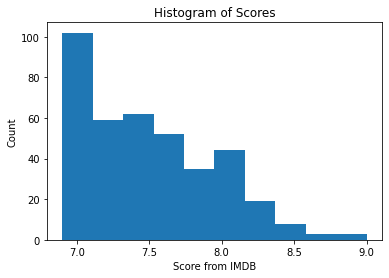

In [27]:
plt.hist(BestMovies['SCORE'])
plt.xlabel('Score from IMDB')
plt.ylabel('Count')
plt.title('Histogram of Scores')
plt.show()

In [22]:
#Thougts - there may be an outlier 

In [23]:
#What happens at the 7.5 mark?
#How do I see a histogram at that mark in more detail?
#We could then reasonably predict that most scores would be in the mean?

In [24]:
#lets take a look at the genre spread

In [ ]:
#Covnert genre from object to string 

In [29]:
BestMovies['MAIN_GENRE'] = BestMovies['MAIN_GENRE'].astype(str)                       

Text(0.5, 1.0, 'Histogram of Scores')

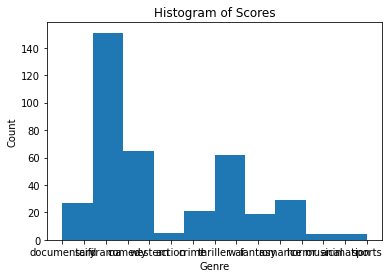

In [31]:
#Try the histogram again 
plt.hist(BestMovies['MAIN_GENRE'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Histogram of Scores')

In [ ]:
#Exploring relationships

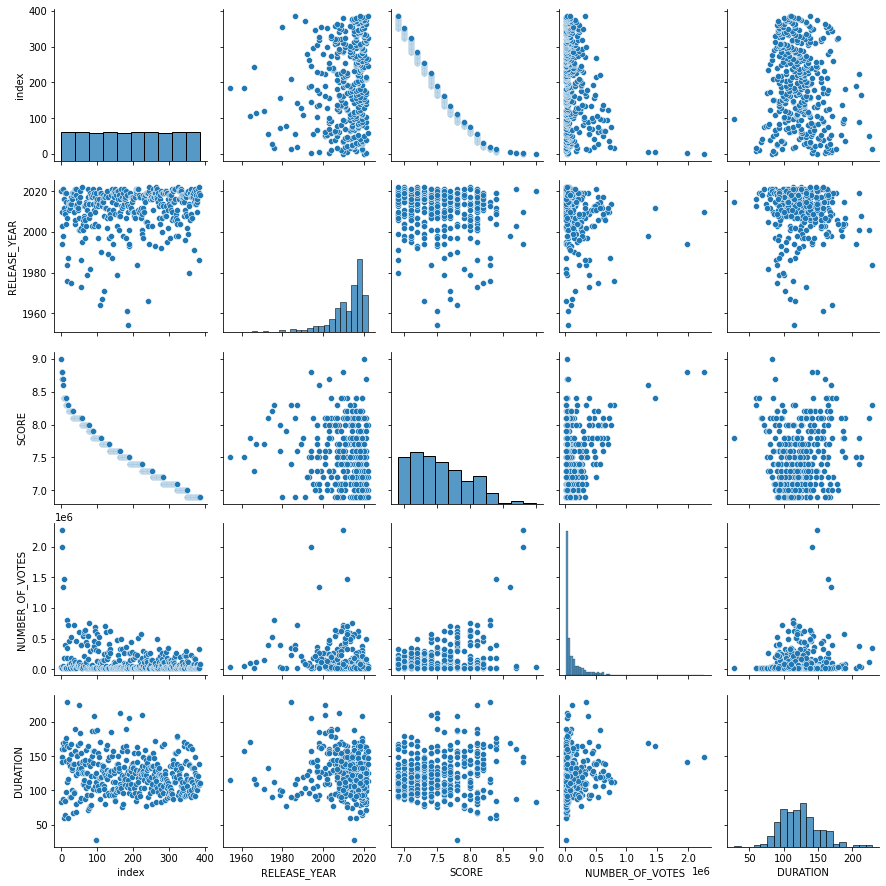

In [32]:
sns.pairplot(BestMovies)

In [33]:
#Looking at correlations

In [34]:
#BestMovies.corr(method='pearson')
corr = BestMovies.corr()
corr.style.background_gradient(cmap='coolwarm')

,index,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION
index,1.000000,0.150550,-0.976896,-0.285799,-0.129268
RELEASE_YEAR,0.150550,1.000000,-0.149726,-0.212883,-0.105250
SCORE,-0.976896,-0.149726,1.000000,0.343683,0.125037
NUMBER_OF_VOTES,-0.285799,-0.212883,0.343683,1.000000,0.103768
DURATION,-0.129268,-0.105250,0.125037,0.103768,1.000000


In [35]:
#Correlation breakdown
#The number of votes is able to explain 34% of the score.
#The duration of the movie is able to explain 12% of the score. 

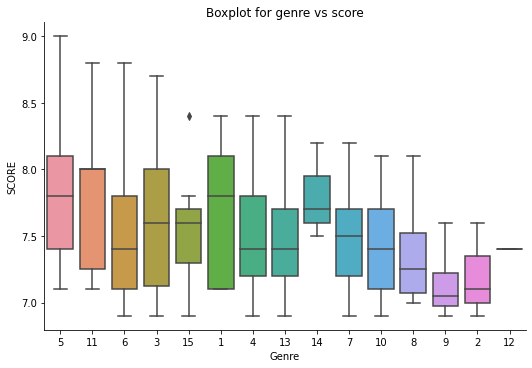

In [39]:
sns.catplot(x="Genre",  y='SCORE', data=BestMovies, kind = 'box', aspect=1.5,)
plt.title('Boxplot for genre vs score')
plt.show()

In [35]:
#Drama and action have high median scores

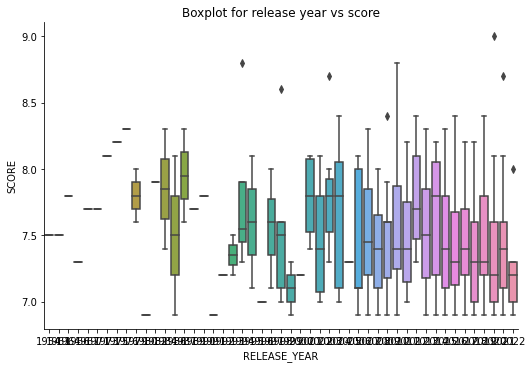

In [40]:
sns.catplot(x="RELEASE_YEAR",  y='SCORE', data=BestMovies, kind = 'box', aspect=1.5)
plt.title('Boxplot for release year vs score')
plt.show()

In [39]:
#well, maybe this helps us see where the outliers are

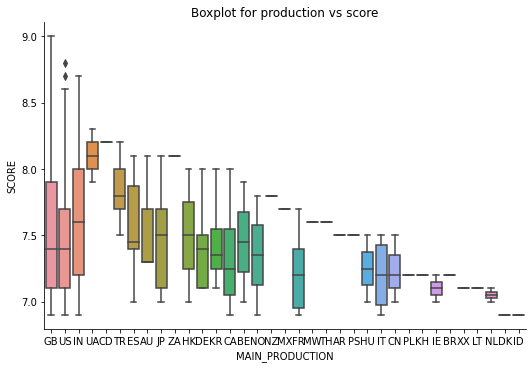

In [41]:
sns.catplot(x="MAIN_PRODUCTION",  y='SCORE', data=BestMovies, kind = 'box', aspect=1.5)
plt.title('Boxplot for production vs score')
plt.show()

In [42]:
#Several production locations have higher relation to scores than productions in the united states